In [1]:
#References:
#https://opendatascience.com/embedding-interactive-python-plots-on-the-web/?utm_campaign=Newsletters&utm_medium=email&_hsmi=2&_hsenc=p2ANqtz--9ju4h651J6NaK1pLkn9DCiyfX8TLk0l5HUxfxVJxin81YXEHMvIGH2_K5Y8VxQMxwDM0ZUVk3J8ulwIFLh4x4WOdNVA&utm_content=2&utm_source=hs_email

In [46]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import math


In [47]:
set_wd = os.chdir(r"C:\Users\Tlhogi\Documents\Grace\Investment Work\6. MM and Cash\Risk-Free Rates\Github")

In [50]:
# Load the data
df_rates   = pd.read_csv('OECD_Short Interest Rates.csv')
df_CPI     = pd.read_csv('OECD_CPI.csv')
titles     = pd.read_csv('Titles.csv')
data_tags  = pd.read_csv('Data_tags.csv')

# Remove the unnecessary columns
df_rates = df_rates.drop(columns=['Flag Codes'])
df_CPI   = df_CPI.drop(columns=['Flag Codes'])

df_rates.info()
df_CPI.info()
titles.info()
data_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27031 entries, 0 to 27030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   27031 non-null  object 
 1   INDICATOR  27031 non-null  object 
 2   SUBJECT    27031 non-null  object 
 3   MEASURE    27031 non-null  object 
 4   FREQUENCY  27031 non-null  object 
 5   TIME       27031 non-null  object 
 6   Value      27031 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292989 entries, 0 to 292988
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   LOCATION   292989 non-null  object 
 1   INDICATOR  292989 non-null  object 
 2   SUBJECT    292989 non-null  object 
 3   MEASURE    292989 non-null  object 
 4   FREQUENCY  292989 non-null  object 
 5   TIME       292989 non-null  object 
 6   Value      292989 non-null  float64
d

In [34]:
# Filter the data based on conditions
df_rates_annual = df_rates[df_rates['FREQUENCY'] == 'A']
df_CPI_annual = df_CPI[(df_CPI['FREQUENCY'] == 'A') & (df_CPI['SUBJECT'] == 'TOT') & (df_CPI['MEASURE'] == 'AGRWTH')]

df_rates_annual.info()
df_CPI_annual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1538 entries, 562 to 26022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   1538 non-null   object 
 1   INDICATOR  1538 non-null   object 
 2   SUBJECT    1538 non-null   object 
 3   MEASURE    1538 non-null   object 
 4   FREQUENCY  1538 non-null   object 
 5   TIME       1538 non-null   object 
 6   Value      1538 non-null   float64
dtypes: float64(1), object(6)
memory usage: 96.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 118 to 290255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   2760 non-null   object 
 1   INDICATOR  2760 non-null   object 
 2   SUBJECT    2760 non-null   object 
 3   MEASURE    2760 non-null   object 
 4   FREQUENCY  2760 non-null   object 
 5   TIME       2760 non-null   object 
 6   Value      2760 non-null   float64
dtypes: float64(1)

In [35]:
#Join the dataframes
merged_df = df_rates_annual.merge(df_CPI_annual, on=['LOCATION', 'TIME', "FREQUENCY"], suffixes=('_rates', '_cpi'))
merged_df = merged_df.sort_values(by='TIME')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 191 to 1459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOCATION         1460 non-null   object 
 1   INDICATOR_rates  1460 non-null   object 
 2   SUBJECT_rates    1460 non-null   object 
 3   MEASURE_rates    1460 non-null   object 
 4   FREQUENCY        1460 non-null   object 
 5   TIME             1460 non-null   object 
 6   Value_rates      1460 non-null   float64
 7   INDICATOR_cpi    1460 non-null   object 
 8   SUBJECT_cpi      1460 non-null   object 
 9   MEASURE_cpi      1460 non-null   object 
 10  Value_cpi        1460 non-null   float64
dtypes: float64(2), object(9)
memory usage: 136.9+ KB


In [36]:
# Identify the years with data for ZAF
zaf_years = merged_df[merged_df['LOCATION'] == 'ZAF']['TIME'].unique()

# Create a list of all unique countries
all_countries = merged_df['LOCATION'].unique()

print(zaf_years.view())
print(all_countries.view())

['1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021' '2022']
['CAN' 'BEL' 'DEU' 'USA' 'AUS' 'FRA' 'NZL' 'ESP' 'ITA' 'NOR' 'ZAF' 'NLD'
 'SWE' 'IRL' 'GBR' 'PRT' 'COL' 'DNK' 'FIN' 'ISL' 'AUT' 'HUN' 'KOR' 'POL'
 'ISR' 'CZE' 'GRC' 'SVK' 'MEX' 'RUS' 'EST' 'LVA' 'CHL' 'IDN' 'CHN' 'LUX'
 'LTU' 'CHE' 'SVN' 'JPN' 'IND' 'CRI']


In [37]:
# Create a new DataFrame with nonsensical data for years without ZAF data
# This is because I want to retain the country data for the years where it is available
# Plotly otherwise eliminates the full record of country data, reducing the sample of countries visible over time

nonsensical_data = []
for year in zaf_years:
    if year in merged_df['TIME'].unique():
        locations_with_data = merged_df[merged_df['TIME'] == year]['LOCATION'].unique()
        locations_without_data = np.setdiff1d(all_countries, locations_with_data)
        
        for location in locations_without_data:
            nonsensical_data.append({'LOCATION': location, 'TIME': year, 'Value_cpi': -100.0, 'Value_rates': -100.0})

nonsensical_df = pd.DataFrame(nonsensical_data)
nonsensical_df.tail()

,LOCATION,TIME,Value_cpi,Value_rates
423,CHL,2020,-100.0,-100.0
424,RUS,2020,-100.0,-100.0
425,CHN,2022,-100.0,-100.0
426,CRI,2022,-100.0,-100.0
427,RUS,2022,-100.0,-100.0


In [38]:
# Combine the nonsensical data with the original filtered data
new_merge_df = pd.concat([merged_df, nonsensical_df], ignore_index=True)
new_merge_df = new_merge_df[new_merge_df['TIME'].isin(zaf_years)]  # Filter out non-ZAF years
new_merge_df.tail()
#new_merge_df.to_csv("new_merge_df.csv")

,LOCATION,INDICATOR_rates,SUBJECT_rates,MEASURE_rates,FREQUENCY,TIME,Value_rates,INDICATOR_cpi,SUBJECT_cpi,MEASURE_cpi,Value_cpi
1883,CHL,NaN,NaN,NaN,NaN,2020,-100.0,NaN,NaN,NaN,-100.0
1884,RUS,NaN,NaN,NaN,NaN,2020,-100.0,NaN,NaN,NaN,-100.0
1885,CHN,NaN,NaN,NaN,NaN,2022,-100.0,NaN,NaN,NaN,-100.0
1886,CRI,NaN,NaN,NaN,NaN,2022,-100.0,NaN,NaN,NaN,-100.0
1887,RUS,NaN,NaN,NaN,NaN,2022,-100.0,NaN,NaN,NaN,-100.0


In [39]:
df_rates_monthly = df_rates[df_rates['FREQUENCY'] == 'M']
average_rates_2023 = df_rates_monthly[df_rates_monthly['TIME'].str.endswith('-23')].groupby('LOCATION')['Value'].mean()
average_rates_2023[:]

LOCATION
AUS      3.790000
AUT      3.090986
BEL      3.090986
BGR      1.265333
CAN      4.865049
CHE      1.283333
CHL     11.240000
CHN      2.928333
COL     13.307143
CRI      5.935000
CZE      7.175714
DEU      3.090986
DNK      3.215573
EA19     3.090986
ESP      3.090986
EST      3.090986
FIN      3.090986
FRA      3.090986
GBR      4.625714
GRC      3.090986
HRV      3.090986
HUN     15.393229
IDN      6.742857
IND      6.738333
IRL      3.090986
ISL      8.243333
ISR      4.230000
ITA      3.090986
JPN     -0.006000
KOR      3.652857
LTU      3.090986
LUX      3.090986
LVA      3.090986
MEX     11.422857
NLD      3.090986
NOR      3.848571
NZL      5.354286
POL      6.891429
PRT      3.090986
ROU      6.821214
SVK      3.090986
SVN      3.090986
SWE      3.300857
USA      5.001429
ZAF      7.565315
Name: Value, dtype: float64

In [40]:
df_CPI_monthly   = df_CPI[(df_CPI['FREQUENCY'] == 'M') & (df_CPI['SUBJECT'] == 'TOT') & (df_CPI['MEASURE'] == 'AGRWTH')]
average_CPI_2023 = df_CPI_monthly[df_CPI_monthly['TIME'].str.endswith('-23')].groupby('LOCATION')['Value'].mean()
average_CPI_2023[:]

LOCATION
ARG          107.381182
AUT            9.632401
BEL            5.774873
BRA            4.550629
CAN            1.451093
CHE            2.519953
CHL            9.720827
CHN            0.683333
COL           12.710429
CZE           13.061081
DEU            7.220192
DNK            5.117183
ESP            3.818338
EST           13.116846
EU27_2020      8.300000
FIN            7.698069
FRA            5.584939
G-20           6.877370
G-7            5.401457
GBR            8.316667
GRC            3.962918
HUN           22.785714
IDN            4.378288
IND            5.531690
IRL            7.312082
ISL            9.403308
ISR            4.904847
ITA            7.837540
JPN            3.466667
KOR            3.741812
LTU           14.003855
LUX            3.853866
LVA           14.364172
MEX            6.329660
NLD            5.921972
NOR            6.387559
OECD           7.534789
OECDE         11.949205
POL           15.050000
PRT            5.742516
SAU            2.876779
SVK    

In [41]:
# Create new rows for 2023 in new_merge_df
new_rows_2023 = []
for location in df_rates['LOCATION']:
    new_row = {
        'LOCATION'     : location,
        'TIME'         : '2023',
        'Value_rates'  : average_rates_2023.get(location, -100.0),   # Set default value if location not found
        'Value_cpi'    : average_CPI_2023.get(location, -100.0)       # Set default value if location not found
    }
    new_rows_2023.append(new_row)

# Create a DataFrame from the new rows
new_rows_df = pd.DataFrame(new_rows_2023)
    
# Append new rows to new_merge_df
final_df = pd.concat([new_merge_df, new_rows_df], ignore_index=True)

#Keeping only the required columns:
final_df = final_df[['LOCATION', 'TIME', 'Value_rates', 'Value_cpi']]

# Remove duplicate rows based on specified columns
final_df = final_df.drop_duplicates(subset=['LOCATION', 'TIME', 'Value_rates', 'Value_cpi'])

final_df[:]

,LOCATION,TIME,Value_rates,Value_cpi
0,CAN,1981,18.375630,12.471610
1,ESP,1981,16.177660,14.549350
2,DEU,1981,12.105000,6.344242
3,FRA,1981,15.259170,13.314400
4,ZAF,1981,9.723521,15.254240
...,...,...,...,...
27363,CRI,2023,5.935000,-100.000000
27546,IND,2023,6.738333,5.531690
27742,BGR,2023,1.265333,-100.000000
27760,ROU,2023,6.821214,-100.000000


In [42]:
#Drop the non-country data from index data
country_index = data_tags.dropna(subset=['COUNTRY_NAME'])
country_index[40:]

,Unnamed: 0,LOCATION,COUNTRY_NAME,Region,SIZE_tag
40,41,EST,Estonia,EM_Other,50
41,42,CHN,China,EM_Other,50
42,43,CRI,Costa Rica,EM_Other,50
43,44,TUR,Turkey,EM_Other,50
44,45,SAU,Saudi Arabia,EM_Other,50
45,46,RUS,Russia,EM_Other,50
46,47,ROU,Romania,EM_Other,50
47,48,HRV,Croatia,EM_Other,50
48,49,ARG,Argentina,EM_Other,50


In [43]:
# Perform a left merge to incorporate COLOUR_tag and SIZE_tag columns from countries_index into final_df
tagged_df = final_df.merge(country_index[['LOCATION', 'Region', 'COUNTRY_NAME', 'SIZE_tag']], on='LOCATION', how='left')
tagged_df = tagged_df.dropna()
tagged_df.sort_values(by=['TIME', 'Region'], ascending=[True, False], inplace=True)
tagged_df[:]

,LOCATION,TIME,Value_rates,Value_cpi,Region,COUNTRY_NAME,SIZE_tag
10,USA,1981,15.910830,10.334710,United States,United States,200.0
4,ZAF,1981,9.723521,15.254240,South Africa,South Africa,400.0
0,CAN,1981,18.375630,12.471610,G7_ex US,Canada,50.0
2,DEU,1981,12.105000,6.344242,G7_ex US,Germany,50.0
3,FRA,1981,15.259170,13.314400,G7_ex US,France,50.0
...,...,...,...,...,...,...,...
1777,DNK,2023,3.215573,5.117183,DM_Europe,Denmark,50.0
1782,ESP,2023,3.090986,3.818338,DM_Europe,Spain,50.0
1790,AUT,2023,3.090986,9.632401,DM_Europe,Austria,50.0
1797,NLD,2023,3.090986,5.921972,DM_Europe,Netherlands,50.0


In [44]:
# Calculate minimum and maximum values for the graph axes excluding -100 values
min_value_x = math.floor(merged_df[merged_df['Value_cpi'] != -100]['Value_cpi'].min())
max_value_x = math.ceil(merged_df[merged_df['Value_cpi'] != -100]['Value_cpi'].max())
min_value_y = math.floor(merged_df[merged_df['Value_rates'] != -100]['Value_rates'].min())
max_value_y = math.ceil(merged_df[merged_df['Value_rates'] != -100]['Value_rates'].max())

# Round to the nearest multiple of 5
min_value_x = min_value_x - (min_value_x % 5)
max_value_x = max_value_x + (5 - max_value_x % 5)
min_value_y = min_value_y - (min_value_y % 5)
max_value_y = max_value_y + (5 - max_value_y % 5)

print("Minimum Inflation    = " , min_value_x)
print("Maximum Inflation    = " , max_value_x)
print("Minimum Nominal Rate = " , min_value_y)
print("Minimum Nominal Rate = " , max_value_y)

Minimum Inflation    =  -5
Maximum Inflation    =  90
Minimum Nominal Rate =  -5
Minimum Nominal Rate =  50


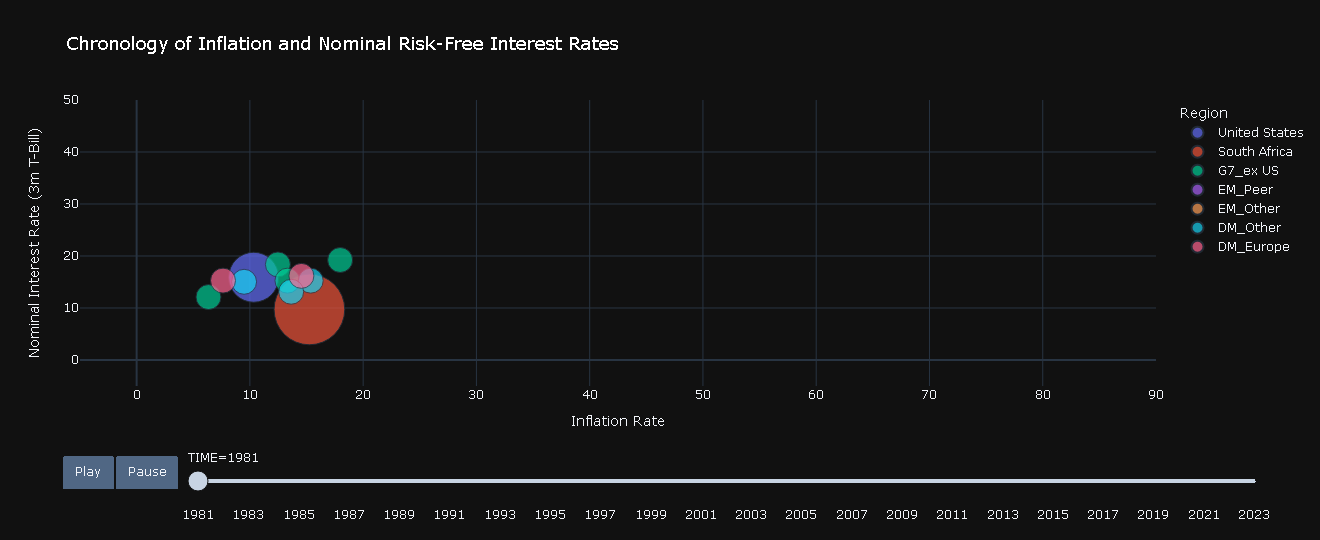

In [51]:
fig = px.scatter(tagged_df, x="Value_cpi", y="Value_rates", 
                     animation_frame="TIME", 
                     animation_group="LOCATION",
                     color="Region", 
                     hover_name="COUNTRY_NAME",
                     size=tagged_df['SIZE_tag'].astype(float),  # Convert SIZE_tag to numeric
                     log_x=False, 
                     range_x=[min_value_x, max_value_x], range_y=[min_value_y, max_value_y],
                     title='Inflation vs Nominal Interest Rate',
                     labels={'Value_cpi': 'Inflation Rate', 'Value_rates': 'Nominal Interest Rate (3m T-Bill)'},
                     width=960, height=540,
                     template='plotly_dark',
                     size_max=50,  # Set the maximum dot size
                )

# Convert 'Year_Text' to integer
titles['Year'] = titles['Year'].astype(int)

# Create a dictionary to map years to titles
year_to_title = dict(zip(titles['Year'], titles['Text']))

# Iterate through the frames to update layout with annotations
for k in range(len(fig.frames)):
    frame_time = int(fig.frames[k].name)
    annotation_text = year_to_title.get(frame_time, "")  # Get title from the dictionary
    
    if annotation_text:
        fig.frames[k].layout.title = annotation_text  # Set the title text

fig.update_traces(
    marker=dict(opacity=0.7), 
    selector=dict(mode='markers')
)

fig.update_layout(
    updatemenus=[
        dict(type='buttons',
             showactive=False,
             buttons=[
                 dict(label='Play',
                      method='animate',
                      args=[None, dict(frame=dict(duration=5000), fromcurrent=True, transition=dict(duration=0))]
                     ),
                 dict(label='Pause',
                      method='animate',
                      args=[[None], dict(frame=dict(duration=0), mode='immediate', transition=dict(duration=0))]
                     )
             ]
            )
        ],
    sliders=[dict(steps=[dict(args=[[f.name], dict(mode='immediate', redraw=True)],
                              label=str(f.name),
                              method='animate') for f in fig.frames],
                transition=dict(duration=0),
                x=0.1,  # Slider starting position
                len=1.0  # Slider length
               )
            ],
    title=dict(
        text='Chronology of Inflation and Nominal Risk-Free Interest Rates',  # Set initial title
        font=dict(size=18, color="white")
    )
)

fig.show()
